#  Newsvendor Problem

Here we will solve the newsvendor problem. Let's say we have a newspaper stand and we want to know how many newspapers we should order for the next day. Let's consider this problem in several formulations. We assume that the demand for the newspapers is W, the amount we order is x, the cost of each newspaper is c, and the selling price is p. We also assume that we can only order in integer quantities.

##  1. Deterministic Demand
If the demand, W, is deterministic, then we can solve the problem by maximizing the performance measure. The performance measure is given by the following equation:

$$
\begin{align}
F(x, W) &= p \min(x, W) - c x \\
\end{align}
$$

For the simplest case, let's consider that in all days the demand is 100 and $p = 2$ and $c = 1$. We can solve this problem by maximizing the performance measure.

Intuitively, we can see that the optimal solution is to order 100 newspapers. Let's see if we can find this solution using the plot of the performance measure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def F(x, W, p, c):
    return p * min(x, W) - c * x

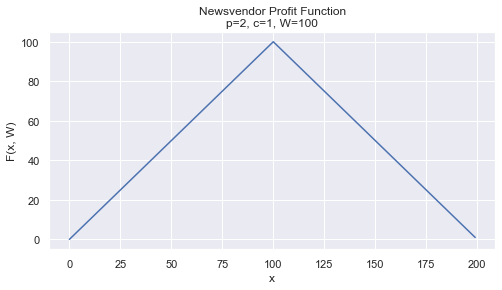

In [3]:
p, c = 2, 1
W = 100
xs = list(range(0, 2 * W))
ys = [F(x, W, p, c) for x in xs]

sns.set()
plt.figure(figsize=(8, 4))
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('F(x, W)')
plt.title(f'Newsvendor Profit Function\np={p}, c={c}, W={W}')
plt.show()

##  2. Stochastic Demand with Known Distribution

Now let's consider that the demand is stochastic, but we know the distribution. Let's assume that the demand is normally distributed with mean 100 and standard deviation 20. We can solve this problem by maximizing the expected performance measure. The expected performance measure is given by the following equation:

$$
\begin{align}
F(x) &= \mathbb{E}[F(x, W)]
\end{align}
$$

where $F(x, W)$ is the cost function defined above. We can solve this problem by maximizing the expected performance measure. To do so, let's calculate the derivate of the expected performance measure with respect to $x$ and set it to zero. The derivative is given by the following equation:

$$
\begin{align}
\frac{d F(x)}{d x} &= \frac{d \mathbb{E}[F(x, W)]}{d x} \\
&= p - c - p.F_W(x)
\end{align}
$$

where $F_W(x)$ is the cumulative distribution function of the demand. We can solve this equation for $x$ and find the optimal solution. Let's equate the derivative to zero and solve for $x$.

$$
\begin{align}
&\frac{d F(x)}{d x} = 0 \\
&p - c - p.F_W(x) = 0 \\
&F_W(x) = \frac{p - c}{p} \\
\end{align}
$$

We can solve this equation for $x$ using the inverse of the cumulative distribution function of the demand. Let's solve this equation for the case where $p = 2$ and $c = 1$. So, we should find an x such that the cumulative distribution function of the demand is equal to 0.5. Again, intuitively, we can see that the optimal solution is to order 100 newspapers. Let's see if we can find this solution.

In [4]:
from scipy.stats import norm

p, c = 2, 1
W_mean = 100
W_std = 20
W = norm(W_mean, W_std)
x_opt = W.ppf((p - c) / p)
print(f'Optimal order quantity: {x_opt:.2f}')

Optimal order quantity: 100.00


We're almost 100! Although we must note that our normal distribution in code is not discrete and also can take negative values. Let's try to solve this problem using a discrete distribution. Let's assume that the demand is a discrete Poisson distribution with mean 100. Let's see the plot of the probability mass function of this Poisson distribution.

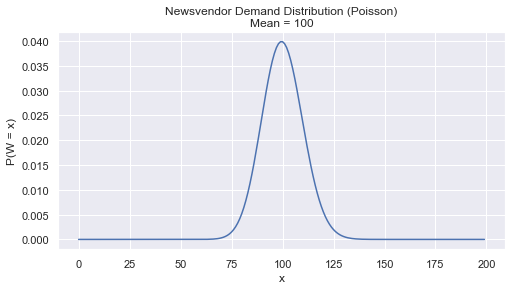

In [5]:
from scipy.stats import poisson

W_mean = 100
W = poisson(W_mean)

xs = list(range(0, 2 * W_mean))
ys = [W.pmf(x) for x in xs]

sns.set()
plt.figure(figsize=(8, 4))
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('P(W = x)')
plt.title(f'Newsvendor Demand Distribution (Poisson)\nMean = {W_mean}')
plt.show()


Now, let's find the optimal solution using the same method as before.

In [6]:
p, c = 2, 1
x_opt = W.ppf((p - c) / p)
print(f'Optimal order quantity: {x_opt:.2f}')


Optimal order quantity: 100.00


We can see again that we have the same solution.

##  3. Stochastic Demand with Unknown Distribution

Now let's consider that the demand is stochastic, but we don't know the distribution. We can solve this problem by maximizing the expected performance measure. The optimization update rule is given by the following equation:

$$
\begin{align}
x_{n+1} &= \text{Max}\{0, x_n + \alpha_n \frac{d F(x_n, W_{n+1})}{d x_n}\}
\end{align}
$$

where $F(x_n, W_{n+1})$ is the performance measure for the demand $W_{n+1}$ and $x_n$. Here, we only need to find a policy to set the learning rate $\alpha_n$. We use three methods here.

1. Constant learning rate
2. Harmonic Learning rate which is proportional to the inverse of the iteration number
3. Kesten's learning rate which is proportional to number of times the derivative has changed sign

Since we need the derivative of the performance measure, let's implement it first.

In [7]:
def grad(x, W, p, c):
    return p - c if x < W else -c

###  3.1. Constant Learning Rate

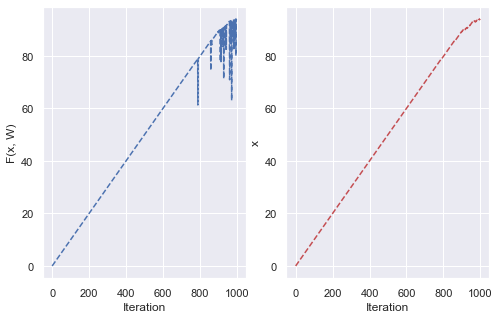

In [8]:
lr = 0.1
n_iters = 1000
x = 0
xs = [x]
ws = W.rvs(n_iters+1)
fs = [F(x, ws[1], p, c)]

for i in range(1, n_iters):
    x += lr * grad(x, ws[i+1], p, c)
    xs.append(x)
    fs.append(F(x, ws[i+1], p, c))


sns.set()
fig, ax = plt.subplots(1, 2, figsize=(8,5))
ax[0].plot(range(n_iters), fs, 'b--')
ax[1].plot(range(n_iters), xs, 'r--')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('F(x, W)')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('x')
plt.show()


Now let's do all the process in one function.

In [9]:
def optimizeConstant(p, c, ws, lr=0.1, n_iters=1000, x0=0):
    x = x0
    xs = [x0]
    fs = [F(x0, ws[1], p, c)]

    for i in range(1, n_iters):
        x += lr * grad(x, ws[i+1], p, c)
        xs.append(x)
        fs.append(F(x, ws[i+1], p, c))

    return xs, fs 

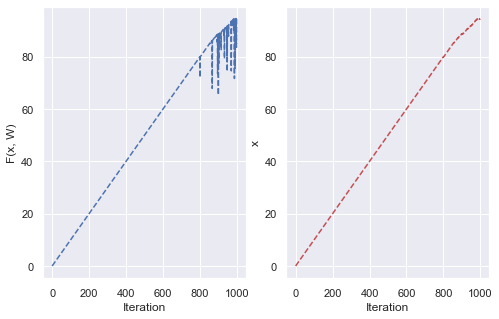

In [10]:
p, c =  2, 1
ws = W.rvs(n_iters+1)
xs, fs = optimizeConstant(p, c, ws, 0.1, 1000, 0)

sns.set()
fig, ax = plt.subplots(1, 2, figsize=(8,5))
ax[0].plot(range(n_iters), fs, 'b--')
ax[1].plot(range(n_iters), xs, 'r--')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('F(x, W)')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('x')
plt.show()

###  3.2. Harmonic Learning Rate

In [11]:
def optimizeHarmonic(p, c, ws, theta_0=10, n_iters=1000, x0=0):
    x = x0
    xs = [x0]
    fs = [F(x0, ws[1], p, c)]

    for i in range(1, n_iters):
        lr = theta_0 / (theta_0 + i)
        x += lr * grad(x, ws[i+1], p, c)
        xs.append(x)
        fs.append(F(x, ws[i+1], p, c))

    return xs, fs 

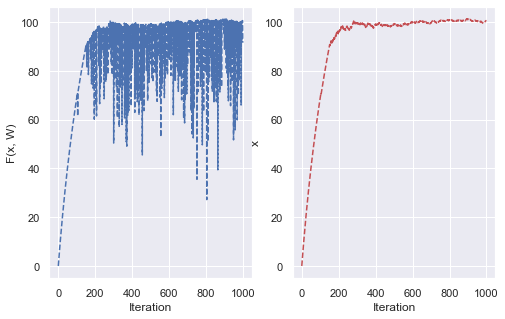

In [13]:
p, c =  2, 1
ws = W.rvs(n_iters+1)
xs, fs = optimizeHarmonic(p, c, ws, 100, 1000, 0)

sns.set()
fig, ax = plt.subplots(1, 2, figsize=(8,5))
ax[0].plot(range(n_iters), fs, 'b--')
ax[1].plot(range(n_iters), xs, 'r--')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('F(x, W)')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('x')
plt.show()

###  3.3. Kesten's Learning Rate

In [18]:
def optimizeKesten(p, c, ws, theta_0=10, n_iters=1000, x0=0):
    x = x0
    xs = [x0]
    fs = [F(x0, ws[1], p, c)]
    K = 0
    old_grad = grad(x, ws[0], p, c)
    for i in range(1, n_iters):
        if old_grad * (current_grad := grad(x, ws[i+1], p, c)) < 0:
            K -=- 1
        lr = theta_0 / (theta_0 + K)
        x += lr * current_grad
        xs.append(x)
        fs.append(F(x, ws[i+1], p, c))
        old_grad = current_grad

    return xs, fs 

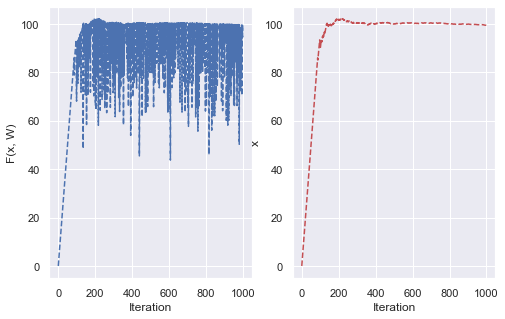

In [19]:
p, c =  2, 1
ws = W.rvs(n_iters+1)
xs, fs = optimizeKesten(p, c, ws, 10, 1000, 0)

sns.set()
fig, ax = plt.subplots(1, 2, figsize=(8,5))
ax[0].plot(range(n_iters), fs, 'b--')
ax[1].plot(range(n_iters), xs, 'r--')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('F(x, W)')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('x')
plt.show()

##  All-In-One

Let's compare all the methods

In [31]:
lr_consts = [0.1, 0.5, 1.]
lr_harmonics = [10, 50, 100]
lr_kestens = [10, 50, 100]
N = 100
n_iters = 1000
x0 = 0

p, c =  2, 1
X_consts, F_consts = [[] for _ in range(len(lr_consts))], [[] for _ in range(len(lr_consts))]
X_harmonics, F_harmonics = [[] for _ in range(len(lr_harmonics))], [[] for _ in range(len(lr_harmonics))]
X_kestens, F_kestens = [[] for _ in range(len(lr_kestens))], [[] for _ in range(len(lr_kestens))]

for i in range(N):
    ws = W.rvs(n_iters+1)
    for j in range(len(lr_consts)):
        xs, fs = optimizeConstant(p, c, ws, lr_consts[j], n_iters, x0)
        X_consts[j].append(xs)
        F_consts[j].append(fs)
    for j in range(len(lr_harmonics)):
        xs, fs = optimizeHarmonic(p, c, ws, lr_harmonics[j], n_iters, x0)
        X_harmonics[j].append(xs)
        F_harmonics[j].append(fs)
    for j in range(len(lr_kestens)):
        xs, fs = optimizeKesten(p, c, ws, lr_kestens[j], n_iters, x0)
        X_kestens[j].append(xs)
        F_kestens[j].append(fs)

X_consts = np.array(X_consts).mean(axis=1)
F_consts = np.array(F_consts).mean(axis=1)
X_harmonics = np.array(X_harmonics).mean(axis=1)
F_harmonics = np.array(F_harmonics).mean(axis=1)
X_kestens = np.array(X_kestens).mean(axis=1)
F_kestens = np.array(F_kestens).mean(axis=1)

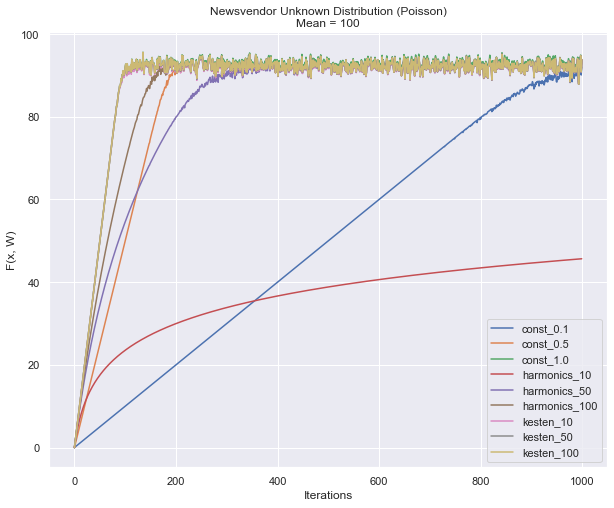

In [32]:
sns.set()
plt.figure(figsize=(10, 8))
for i in range(len(lr_consts)):
    plt.plot(range(n_iters), F_consts[i], label=f'const_{lr_consts[i]}')
for i in range(len(lr_harmonics)):
    plt.plot(range(n_iters), F_harmonics[i], label=f'harmonics_{lr_harmonics[i]}')
for i in range(len(lr_kestens)):
    plt.plot(range(n_iters), F_kestens[i], label=f'kesten_{lr_kestens[i]}')
plt.xlabel('Iterations')
plt.ylabel('F(x, W)')
plt.title(f'Newsvendor Unknown Distribution (Poisson)\nMean = {W_mean}')
plt.legend()
plt.show()


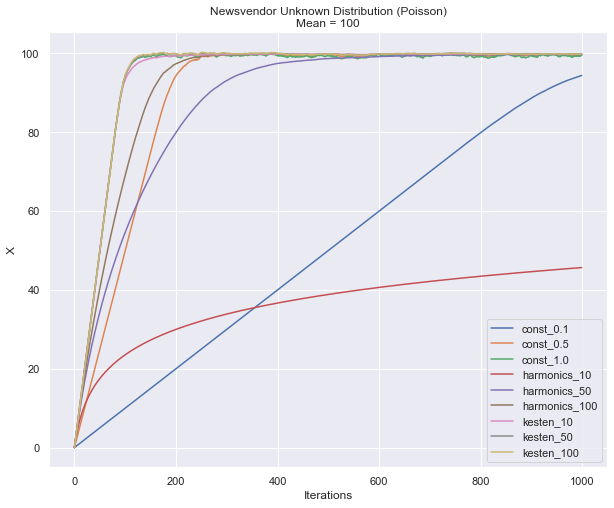

In [33]:
sns.set()
plt.figure(figsize=(10, 8))
for i in range(len(lr_consts)):
    plt.plot(range(n_iters), X_consts[i], label=f'const_{lr_consts[i]}')
for i in range(len(lr_harmonics)):
    plt.plot(range(n_iters), X_harmonics[i], label=f'harmonics_{lr_harmonics[i]}')
for i in range(len(lr_kestens)):
    plt.plot(range(n_iters), X_kestens[i], label=f'kesten_{lr_kestens[i]}')
plt.xlabel('Iterations')
plt.ylabel('X')
plt.title(f'Newsvendor Unknown Distribution (Poisson)\nMean = {W_mean}')
plt.legend()
plt.show()
